# Программирование на языке Python для сбора и анализа данных

*Текст лекции: Щуров И.В., НИУ ВШЭ*

Данный notebook является конспектом лекции по курсу «Программирование на языке Python для сбора и анализа данных» (НИУ ВШЭ, 2015-16). Он распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0](http://creativecommons.org/licenses/by-sa/4.0/). При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса](http://math-info.hse.ru/s15/m). Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние](http://creativecommons.org/publicdomain/zero/1.0/).

Другие материалы курса, включая конспекты и видеозаписи лекций, а также наборы задач, можно найти на [странице курса](http://math-info.hse.ru/s15/m).

## Лекция №12: Библиотека pandas

Мы обсуждали разные структуры данных — списки, словари, массивы, сложные структуры, составленные из списков и словарей, XML-файлы и т.д. Однако самый распространённый вид, в котором обычно представляют данные для их анализа — это таблицы. Проще всего сохранить таблицу в Python в списке, элементами которого являются списки — строки таблицы. Например, вот такая табличка:

<table>
<tr>
<td>1</td><td>2</td><td>3</td>
</tr>
<tr>
<td>4</td><td>5</td><td>6</td>
</tr>
</table>

будет записана вот в таком виде:

In [1]:
table = [[1, 2, 3], [4, 5, 6]]

In [2]:
table

[[1, 2, 3], [4, 5, 6]]

Например, можно получить третий элемент второй строки вот так:

In [3]:
table[1][2]

6

Или целиком первую строку:

In [4]:
table[0]

[1, 2, 3]

Эта структура простая и понятная, однако не слишком удобная. Например, получить первый *столбец* уже не так просто. (Хорошее упражнение — написать для этого правильный код.)

Есть ещё одна проблема: такая структура очень медленная. К счастью, хорошие люди уже написали для нас библиотеку по работе с табличными данными. Она называется *pandas*.

### Датафреймы

In [5]:
import pandas as pd

В pandas реализованы типы данных с разным числом измерений: одномерный тип (просто ряд) называется `Series`, двумерный (табличка) — `DataFrame`, трёхмерный — `Panel`. Мы будем обсуждать преимущественно `DataFrame`. Про `Series` скажем пока только то, что эта штука очень похожа на `np.array`.

Давайте сделаем датафрейм из нашей таблички.

In [6]:
df = pd.DataFrame(table)

In [7]:
df

,0,1,2
0,1,2,3
1,4,5,6


У такой таблицы можно обращаться к строкам, а можно и к столбцам:

In [8]:
df[0] # первый столбец

0    1
1    4
Name: 0, dtype: int64

Номера слева соответствуют номерам (а точнее индексам) строк. Перед нами объект `pd.Series`, представляющий собой нечто среднее между `np.array` и словарём (ниже мы столкнёмся с этим более явно, когда индексы будут не последовательными целыми числами, а строками).

In [9]:
df.loc[0] # первая строка

0    1
1    2
2    3
Name: 0, dtype: int64

In [10]:
df.loc[1] # вторая строка

0    4
1    5
2    6
Name: 1, dtype: int64

### Загрузка датафрейма из CSV-файла

Для дальнейшего рассмотрим простой CSV-файл с данными, изображающими результаты нескольких виртуальных студентов по некоторым домашкам. Я подготовил этот файл и сохранил его на сервере. Давайте для начала посмотрим на него «глазами»:

In [11]:
import requests
r = requests.get("http://math-info.hse.ru/f/2015-16/all-py/data/simple.csv")
print(r.text)

Assignment, Ann,Bob,Claudia,Daniel
Limits, 1,2,3,2
Derivatives, 2.3,1.2,3.2,1.2
Integrals, 2.1,2.3,2.3,2.2
Vectors, 4,2.5,2.4,1.2
Operators, 6,5,4,5




Здесь `Ann`, `Bob` и т.д. — имена студентов, `Limits`, `Derivatives` и т.д. — названия домашних работ. Загрузим наш файл в `Pandas` — для этого его даже не нужно скачивать — можно передать функции `pd.read_csv()` URL (сетевой адрес) нашего файла (хотя, конечно, можно было бы открыть и локальный файл с тем же успехом):

In [12]:
df = pd.read_csv("http://math-info.hse.ru/f/2015-16/all-py/data/simple.csv")

In [13]:
df

,Assignment,Ann,Bob,Claudia,Daniel
0,Limits,1.0,2.0,3.0,2.0
1,Derivatives,2.3,1.2,3.2,1.2
2,Integrals,2.1,2.3,2.3,2.2
3,Vectors,4.0,2.5,2.4,1.2
4,Operators,6.0,5.0,4.0,5.0


Заметим, что верхняя строчка выделена полужирным — это потому, что она рассматривается не как строчка с данными, а как строчка с именами столбцов. К столбцам можно обращаться по имени (примерно как к элементам словарей).

In [14]:
df['Bob']

0    2.0
1    1.2
2    2.3
3    2.5
4    5.0
Name: Bob, dtype: float64

У строк по умолчанию нет имён, и им присваивются номера (левая полужирная колонка). Можно было бы загрузить файл таким образом, чтобы первый столбец рассматривался как столбец с именами строк (индексам), для этого надо передать `pd.read_csv()` параметр `index_col` с номером нужного столбца:

In [15]:
df = pd.read_csv(
    "http://math-info.hse.ru/f/2015-16/all-py/data/simple.csv", 
    index_col=0
)

In [16]:
df

,Ann,Bob,Claudia,Daniel
Assignment,,,,
Limits,1.0,2.0,3.0,2.0
Derivatives,2.3,1.2,3.2,1.2
Integrals,2.1,2.3,2.3,2.2
Vectors,4.0,2.5,2.4,1.2
Operators,6.0,5.0,4.0,5.0


Теперь можно посмотреть на строчку, обратившись к ней по имени (то есть по названию домашки):

In [17]:
df.loc['Limits']

 Ann       1
Bob        2
Claudia    3
Daniel     2
Name: Limits, dtype: float64

Заметим, что теперь столбец слева состоит не из последовательных чисел, а из строк, являющихся именами соответствующих столбцов в исходной таблице.

> В статистике, строчка датафрейма называется «наблюдением» (*observation*), а столбец — «переменной» (*variable*). Данные в столбце должны быть однородны (например, может быть столбец, состоящий только из чисел или только из строк, но не может быть столбца, в котором перемешаны строки и числа), а по строкам могут быть разнородны.

Слово `Assignment` при отображении `df` — не имя какой-то строчки, а имя столбца с индексами.

In [18]:
df.index

Index(['Limits', 'Derivatives', 'Integrals', 'Vectors', 'Operators'], dtype='object', name='Assignment')

Его можно убрать вот так:

In [19]:
df.index.name = None

In [20]:
df

,Ann,Bob,Claudia,Daniel
Limits,1.0,2.0,3.0,2.0
Derivatives,2.3,1.2,3.2,1.2
Integrals,2.1,2.3,2.3,2.2
Vectors,4.0,2.5,2.4,1.2
Operators,6.0,5.0,4.0,5.0


Вот так можно обратиться к конкретному элементы таблицы:

In [21]:
df.at['Limits', 'Bob']

2.0

Попробуем то же самое с `Ann`:

In [22]:
df.at['Limits', 'Ann']

KeyError: 'Ann'

Что-то не сработало, хотя `Ann`, очевидно, присутствует в нашем датафрейме. Посмотрим поближе на список имён столбцов:

In [23]:
df.columns

Index([' Ann', 'Bob', 'Claudia', 'Daniel'], dtype='object')

Вот в чём дело! Перед именем `Ann` вкрался лишний пробел. Это потому, что я делал CSV-файл ручками и решил, что так будет более красиво. Ну что же, давайте переименуем первый столбец, убрав оттуда пробел. Сделать это, напрямую манипулируя элементами `df.columns` не получится (там неизменяемый объект), но зато можно присвоить этой переменной новый список, в котором имя первого столбца будет правильным.

In [24]:
my_columns = list(df.columns)
print(my_columns)
my_columns[0] = 'Ann'
print(my_columns)

[' Ann', 'Bob', 'Claudia', 'Daniel']
['Ann', 'Bob', 'Claudia', 'Daniel']


In [25]:
df.columns = my_columns

In [26]:
df['Ann']

Limits         1.0
Derivatives    2.3
Integrals      2.1
Vectors        4.0
Operators      6.0
Name: Ann, dtype: float64

### Срезы

Несмотря на то, что просто квадратные скобки (безо всяких `.loc` перед ними) позволяют обращаться к столбцам таблицы, те же самые квадратные скобки, используемые вместе со срезами, работают «по строчкам». Например, вот так можно получить вторую и третью строчки таблицы:

In [27]:
df[1:3]

,Ann,Bob,Claudia,Daniel
Derivatives,2.3,1.2,3.2,1.2
Integrals,2.1,2.3,2.3,2.2


Срезы можно делать не только по номерам строк, но и по их именам:

In [28]:
df['Limits':'Vectors']

,Ann,Bob,Claudia,Daniel
Limits,1.0,2.0,3.0,2.0
Derivatives,2.3,1.2,3.2,1.2
Integrals,2.1,2.3,2.3,2.2
Vectors,4.0,2.5,2.4,1.2


Важная разница состоит в том, что теперь срез *включает* последний элемент (в отличие от всего, что вы знали раньше о срезах). Срезы с номерами строк ведут себя как обычно (последний элемент не включается):

In [29]:
df[0:1]

,Ann,Bob,Claudia,Daniel
Limits,1,2,3,2


Ещё можно обратиться к столбцу по его имени вот так:

In [30]:
df.Ann

Limits         1.0
Derivatives    2.3
Integrals      2.1
Vectors        4.0
Operators      6.0
Name: Ann, dtype: float64

Но это не самый безопасный способ. Во-первых, чтобы он сработал, имя столбца должно быть валидным идентификатором Python (то есть таким словом, каким можно назвать переменную), а это не всегда верно — например, в имени столбца могут встречаться пробелы, и в этом случае способ обращения через точку не сработает. Во-вторых, использовать такое обращение при присваивании небезопасно. Например, редактирование конкретной ячейки в уже созданном столбце сработает:

In [31]:
df.Ann['Limits'] = 2.0 # Ann пересдала домашку по пределам

In [32]:
df

,Ann,Bob,Claudia,Daniel
Limits,2.0,2.0,3.0,2.0
Derivatives,2.3,1.2,3.2,1.2
Integrals,2.1,2.3,2.3,2.2
Vectors,4.0,2.5,2.4,1.2
Operators,6.0,5.0,4.0,5.0


А создание нового столбца таким образом не сработает:

In [33]:
df.Julia = [1, 2, 3, 4, 5]

In [34]:
df

,Ann,Bob,Claudia,Daniel
Limits,2.0,2.0,3.0,2.0
Derivatives,2.3,1.2,3.2,1.2
Integrals,2.1,2.3,2.3,2.2
Vectors,4.0,2.5,2.4,1.2
Operators,6.0,5.0,4.0,5.0


Если бы мы хотели добавить новый столбец, нужно было бы использовать синтаксис с квадратными скобками:

In [35]:
df['Julia'] = [1, 2, 3, 4, 5]

In [36]:
df

,Ann,Bob,Claudia,Daniel,Julia
Limits,2.0,2.0,3.0,2.0,1
Derivatives,2.3,1.2,3.2,1.2,2
Integrals,2.1,2.3,2.3,2.2,3
Vectors,4.0,2.5,2.4,1.2,4
Operators,6.0,5.0,4.0,5.0,5


### Ещё о способах обращения к элементам датафреймов

Как мы уже видели выше, есть несколько способов обращаться к элементам датафрейма. Во-первых, просто квадратные скобки. Если передать им один элемент, то вернётся столбец с соответствующим именем. Кстати, если передать список из нескольких элементов, то вернётся датафрейм с соответствующими столбцами:

In [37]:
df[['Ann', 'Bob']]

,Ann,Bob
Limits,2.0,2.0
Derivatives,2.3,1.2
Integrals,2.1,2.3
Vectors,4.0,2.5
Operators,6.0,5.0


А если передать срез (что-то через двоеточие), то вернётся датафрейм с соответствующими строчками. (Это всё не так-то просто запомнить, увы.)

#### `loc[]`
Второй способ — это метод `loc`. Его надо вызывать также с квадратными скобками, передавая имена. Если передать одно имя, то оно рассматривается как имя строки, а если два, то возвращается ячейка с соответствующей строкой и столбцом:

In [38]:
df.loc['Limits']

Ann        2
Bob        2
Claudia    3
Daniel     2
Julia      1
Name: Limits, dtype: float64

In [39]:
df.loc['Limits', 'Ann']

2.0

А вот так можно с помощью `loc[]` получить столбец:

In [40]:
df.loc[:, 'Ann']

Limits         2.0
Derivatives    2.3
Integrals      2.1
Vectors        4.0
Operators      6.0
Name: Ann, dtype: float64

Здесь в качестве первого аргумента передаётся «тривиальный срез», то есть такой срез, у которого начало совпадает с началом всего массива, а конец с концом всего. Аналогично было со списками, если помните:

In [41]:
my_list = [4, 3, 2, 1]

In [42]:
other_list = my_list[:]
other_list

[4, 3, 2, 1]

#### `iloc[]` 
Метод `loc[]` работает с именами строк и столбцов, а если вы хотите использовать их номера, то вам нужен метод `iloc[]`. Работает он примерно так:

In [43]:
df.iloc[1] # вторая строка

Ann        2.3
Bob        1.2
Claudia    3.2
Daniel     1.2
Julia      2.0
Name: Derivatives, dtype: float64

In [44]:
df.iloc[:, 2] # третий столбец

Limits         3.0
Derivatives    3.2
Integrals      2.3
Vectors        2.4
Operators      4.0
Name: Claudia, dtype: float64

In [45]:
df.iloc[1, 2] # ячейка во второй строке, третьем столбце

3.2000000000000002

#### `at[]` и `iat[]`
Обычные квадратные скобки, а также методы `loc[]` и `iloc[]` должны обрабатывать разные случаи, связанные со срезами и т.д. Это делает их медленными. Если вы хотите обратиться к конкретной ячейке, можете использовать для этого методы `at[]` или `iat[]`.

In [46]:
df.at['Derivatives', 'Ann']

2.2999999999999998

In [47]:
df.iat[1, 2]

3.2000000000000002

### Выбор по условию

Предположим, что нам нужно получить все строки, соответствующие домашкам, по которым *Ann* получила оценку выше тройки. Это делается так:

In [48]:
df[df['Ann']>3]

,Ann,Bob,Claudia,Daniel,Julia
Vectors,4,2.5,2.4,1.2,4
Operators,6,5.0,4.0,5.0,5


Этот синтаксис работает примерно так же, как аналогичный синтаксис в `np.array`, обсуждавшийся на прошлой лекции. Результатом сравнения `df['Ann']` с числом 3 является массив (точкее, `pd.Series`), содержащий булевские элементы, являющиеся результатами попарного сравнения элементов `df['Ann']` с числом 3:

In [49]:
df['Ann']>3

Limits         False
Derivatives    False
Integrals      False
Vectors         True
Operators       True
Name: Ann, dtype: bool

Если передать такой объект квадратным скобкам, то они выберут те элементы, напротив которых стоит `True`.

Аналогично можно выбрать столбцы по условию, с помощью `loc`.

In [50]:
df.loc[:, df.loc['Derivatives']>2] 
# выбрать все столбцы, у которых в строке `Derivatives` оценка больше двух

,Ann,Claudia
Limits,2.0,3.0
Derivatives,2.3,3.2
Integrals,2.1,2.3
Vectors,4.0,2.4
Operators,6.0,4.0


### Операции со строками и столбцами
Допустим, мы хотим посчитать среднюю успеваемость каждого студента. Нет проблем:

In [51]:
df.mean()

Ann        3.28
Bob        2.60
Claudia    2.98
Daniel     2.32
Julia      3.00
dtype: float64

А может быть нас интересует средняя решаемость домашек? Можно предложить два способа её посчитать. Во-первых, можно транспонировать нашу табличку, записав строки по столбцам, и применить к ней тот же метод `mean()`. 

In [52]:
df.T

,Limits,Derivatives,Integrals,Vectors,Operators
Ann,2,2.3,2.1,4.0,6
Bob,2,1.2,2.3,2.5,5
Claudia,3,3.2,2.3,2.4,4
Daniel,2,1.2,2.2,1.2,5
Julia,1,2.0,3.0,4.0,5


In [53]:
df.T.mean()

Limits         2.00
Derivatives    1.98
Integrals      2.38
Vectors        2.82
Operators      5.00
dtype: float64

Во-вторых (и это, наверное, проще), можно передать методу `mean()` параметр `axis`, указывающий, вдоль какой оси нужно считать. (Такое свойство есть у разных функций, работающих со строками или столбцами.)

In [54]:
df.mean(axis=1)

Limits         2.00
Derivatives    1.98
Integrals      2.38
Vectors        2.82
Operators      5.00
dtype: float64

In [55]:
df.mean(axis='columns')
# можно ещё так

Limits         2.00
Derivatives    1.98
Integrals      2.38
Vectors        2.82
Operators      5.00
dtype: float64

Конечно, есть не только среднее, но и другие распространённые функции дескриптивной статистики.

In [56]:
df.min()

Ann        2.0
Bob        1.2
Claudia    2.3
Daniel     1.2
Julia      1.0
dtype: float64

In [57]:
df.max()

Ann        6
Bob        5
Claudia    4
Daniel     5
Julia      5
dtype: float64

### Более сложный датафрейм

Рассмотрим реальный датафрейм, полученный с портала открытых данных г. Москвы. Я его скачал [отсюда](http://data.mos.ru/opendata/7704219722-tarify-na-kommunalnye-uslugi-dlya-naseleniya-goroda-moskvy-na-2012-god?pageNumber=1&versionNumber=2&releaseNumber=1), но там он лежит в zip-файле, который не так-то просто разархивировать из-за кириллицы в имени файла (мне на Маке пришлось повозиться), так что я скопировал CSV'шку на наш сервер. Если попробовать её просто открыть, то появится ошибка, потому что в качестве разделителя там используется не запятая, а точка с запятой — такое часто бывает и у функции `pd.read_csv()` на эту тему есть специальный параметр `sep`:

In [58]:
df = pd.read_csv(
    "http://math-info.hse.ru/f/2015-16/all-py/data/tariff2012.csv",
    sep=';'
)

Таблица большая, выведем только несколько первых строк, чтобы понять, с чем мы имеем дело:

In [59]:
df.head()

,﻿ROWNUM,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
0,1,город Москва (за исключением Троицкого и Новом...,Горячее водоснабжение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,"ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО...",105.45,19693618,NaN
1,2,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,16.65,19693667,NaN
2,3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
3,4,город Москва (за исключением Троицкого и Новом...,Электроэнергия,руб/кВт.ч,01.07.2012,31.07.2012,да,газовая,с 07:00 по 23:00 ч (двухтарифный учет),на бытовые нужды,ОАО «Мосэнергосбыт»,4.03,19693607,NaN
4,5,город Москва (за исключением Троицкого и Новом...,Электроэнергия,руб/кВт.ч,01.01.2012,30.06.2012,да,газовая,с 23:00 по 07:00 ч (двухтарифный учет),на бытовые нужды,ОАО «Мосэнергосбыт»,0.95,19693669,NaN


Кажется, в таблице есть столбец `ROWNUM`, который можно было бы сделать индексом для строк, но тут не всё просто. Например:

In [60]:
df['ROWNUM']

KeyError: 'ROWNUM'

Почему-то эта штука считает, что там нет столбца `ROWNUM`, хотя мы его видим своими глазами! Давайте посмотрим повнимательнее.

In [61]:
df.columns

Index(['﻿ROWNUM', 'Region', 'TariffItem', 'UnitOfMeasure', 'StartDate',
       'EndDate', 'MeasureDeviceAvail', 'StoveType', 'ConsumptionTime',
       'ConsumptionTarget', 'Agency', 'TariffValue', 'global_id',
       'Unnamed: 13'],
      dtype='object')

…Вроде бы есть `ROWNUM`…

In [62]:
list(df.columns)

['\ufeffROWNUM',
 'Region',
 'TariffItem',
 'UnitOfMeasure',
 'StartDate',
 'EndDate',
 'MeasureDeviceAvail',
 'StoveType',
 'ConsumptionTime',
 'ConsumptionTarget',
 'Agency',
 'TariffValue',
 'global_id',
 'Unnamed: 13']

Вот оно! Оказывается, перед `ROWNUM` есть какой-то невидимый символ, кодирующийся как `\ufeff`. Это так называемый BOM — Byte Order Mark — и он вылезает иногда при чтении файлов в кодировках UTF. Он показывает, в каком порядке идут байты. Чтобы он не попал в наши данные, нужно при чтении использовать опцию `encoding='utf-8-sig'`:

In [63]:
df = pd.read_csv(
    "http://math-info.hse.ru/f/2015-16/all-py/data/tariff2012.csv",
    sep=';',
    encoding = 'utf-8-sig'
)

Теперь `df['ROWNUM']` работает:

In [64]:
df['ROWNUM'].head()

0    1
1    2
2    3
3    4
4    5
Name: ROWNUM, dtype: int64

Впрочем, этот столбец нам всё равно в явном виде не понадобится — мы сделаем его индексом строк.

In [65]:
df = pd.read_csv(
    "http://math-info.hse.ru/f/2015-16/all-py/data/tariff2012.csv",
    sep=';',
    encoding='utf-8-sig', 
    index_col=0
)

In [66]:
df.head()

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
1,город Москва (за исключением Троицкого и Новом...,Горячее водоснабжение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,"ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО...",105.45,19693618,NaN
2,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,16.65,19693667,NaN
3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
4,город Москва (за исключением Троицкого и Новом...,Электроэнергия,руб/кВт.ч,01.07.2012,31.07.2012,да,газовая,с 07:00 по 23:00 ч (двухтарифный учет),на бытовые нужды,ОАО «Мосэнергосбыт»,4.03,19693607,NaN
5,город Москва (за исключением Троицкого и Новом...,Электроэнергия,руб/кВт.ч,01.01.2012,30.06.2012,да,газовая,с 23:00 по 07:00 ч (двухтарифный учет),на бытовые нужды,ОАО «Мосэнергосбыт»,0.95,19693669,NaN


Обратите внимание на `NaN` — это такой специальный элемент, который указыает, что в данной ячейке нет данных (например, в исходном файле в эту ячейку ничего не было записано).

### Выбор и группировка

Видно, что в таблице собраны разнородные данные — тарифы на газ, электроэнергию и т.д. Прежде, чем с ними можно будет сделать что-то осмысленное, их надо как-то разделить. Это можно делать, например, с помощью условного выбора: 

In [67]:
df_gas = df[df['TariffItem'] == 'Газ']
df_gas.head()

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
7,город Москва,Газ,руб/куб.м,11.01.2011,15.01.2012,да,NaN,NaN,на приготовление пищи и горячее водоснабжение ...,ООО «Мосрегионгаз»,4.09,19693595,NaN
8,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.09,19693684,NaN
11,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.70,19693624,NaN
12,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на отопление с одновременным использованием га...,ООО «Газпром межрегионгаз Москва»,2930.00,19693625,NaN


Теперь у нас есть табличка, в которой приведены данные только по тарифам на газ.

Другой подход состоит в том, чтобы создать сразу много табличек в зависимости от того, что записано в графе `TariffItem`. Для этого в *pandas* есть метод `groupby()`.

In [68]:
groups = df.groupby('TariffItem')
groups.get_group('Газ').head()

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
7,город Москва,Газ,руб/куб.м,11.01.2011,15.01.2012,да,NaN,NaN,на приготовление пищи и горячее водоснабжение ...,ООО «Мосрегионгаз»,4.09,19693595,NaN
8,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.09,19693684,NaN
11,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.70,19693624,NaN
12,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на отопление с одновременным использованием га...,ООО «Газпром межрегионгаз Москва»,2930.00,19693625,NaN


In [69]:
groups.get_group("Водоотведение")

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
2,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,16.65,19693667,NaN
27,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.09.2012,31.12.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,19.00,19693387,NaN
43,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.07.2012,31.08.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,18.20,19693668,NaN


Список всех групп можно посмотреть так:

In [70]:
groups.groups.keys()

dict_keys(['Горячее водоснабжение', 'Твердое топливо', 'Электроэнергия', 'Холодное водоснабжение', 'Водоотведение', 'Отопление', 'Газ'])

Допустим, нас интересует средний тариф по каждому из типов расходов (как мы увидим ниже, для этой таблицы считать его довольно бессмысленно, но мы всё равно попробуем — просто чтобы показать, как работает *pandas*).

In [71]:
df.groupby('TariffItem').mean()

,TariffValue,global_id,Unnamed: 13
TariffItem,,,
Водоотведение,17.950000,19693574,NaN
Газ,651.415000,19693593,NaN
Горячее водоснабжение,100.095000,19693523,NaN
Отопление,1208.423333,19693631,NaN
Твердое топливо,1126.000000,19693629,NaN
Холодное водоснабжение,25.223333,19693636,NaN
Электроэнергия,2.571250,19693585,NaN


### Приводим данные в порядок

Давайте рассмотрим повнимательнее данные, относящиеся к тарифам на газ. Здесь есть ещё один занятный столбец: `UnitOfMeasure` — единица измерения. Посмотрим, какие значения и как часто он принимает.

In [72]:
df_gas['UnitOfMeasure'].value_counts() 
# эта функция считает, сколько раз какое значение встретилось

руб/куб.м         8
руб/чел           6
руб/1000 куб.м    4
руб/кв.м          2
Name: UnitOfMeasure, dtype: int64

Как видимо, единицы измерения самые разные и вряд ли мы можем как-то легко перевести «руб/кв.м» (видимо, в квадратных метрах меряется всё-таки площадь квартиры, а не количество потребляемого газа) в «руб/куб.м», но по крайней мере «руб/1000 куб.м» и «руб/куб.м» — это что-то похожее. Давайте преобразуем первое во второе: для этого нам надо найти те строки, в которых единица измерения указана как «руб/1000 куб.м», взять для них столбец `TariffValue` и умножить все его элементы на 1000.

Вот нужные нам строки:

In [73]:
unit1000 = df_gas['UnitOfMeasure'] == 'руб/1000 куб.м'
# записали в переменную unit1000 результат проверки условия о том, 
# что UnitOfMeasure == 'руб/1000 куб.м'
df_gas[unit1000]

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
12,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на отопление с одновременным использованием га...,ООО «Газпром межрегионгаз Москва»,2930,19693625,NaN
60,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на отопление с одновременным использованием га...,ООО «Газпром межрегионгаз Москва»,3370,19693626,NaN
62,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на отопление и (или) выработку электрической э...,ООО «Газпром межрегионгаз Москва»,2930,19693627,NaN
64,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на отопление и (или) выработку электрической э...,ООО «Газпром межрегионгаз Москва»,3370,19693628,NaN


Можно было бы теперь взять от этой таблицы столбец `TariffValue` и присвоить ему значение его же, разделенное на 1000. Но результат может оказаться неожиданным.

In [74]:
df_gas[unit1000]['TariffValue']

ROWNUM
12    2930
60    3370
62    2930
64    3370
Name: TariffValue, dtype: float64

In [75]:
df_gas[unit1000]['TariffValue'] = df_gas[unit1000]['TariffValue']/1000

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [76]:
df_gas[unit1000]['TariffValue']

ROWNUM
12    2930
60    3370
62    2930
64    3370
Name: TariffValue, dtype: float64

Ничего не изменилось, да ещё и какая-то страшна красная штука вылезла. Почему так произошло? Дело в том, что взяв подмножество строк с помощью `df_gas[unit1000]`, мы могли создать либо копию исходной таблички, либо её вид (то есть просто интерфейс). Если это был вид, то приравнивание могло сработать как надо. А если копия, то приравнивание произошло к копии, а оригинальная таблица осталась неизменной. К сожалению, заранее неизвестно, что будет возвращено квадратными скобками — вид или копия — это зависит от внутренней структуры данных. Так что нужно рассчитывать на худшее.

Чтобы избежать таких проблем, вместо применения несколько квадратных скобок подряд, нужно писать одни скобки, в них указывая, какие элементы нам нужны, указывая наборы строк и столбцов через запятую, как это обсуждалось выше. Например, вот так это сработает:

In [77]:
df_gas.loc[unit1000, 'TariffValue'] = df_gas.loc[unit1000, 'TariffValue']/1000

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Тоже предупреждение, но по крайней мере результат удовлетворительный:

In [78]:
df_gas.loc[unit1000, 'TariffValue']

ROWNUM
12    2.93
60    3.37
62    2.93
64    3.37
Name: TariffValue, dtype: float64

Предупреждение, кстати, возникло из-за того, что `df_gas` сам является такой копией, полученной из `df` путём выделения подмножества строк по условию. Заметим, что исходный датафрейм `df` в результате не изменился — именно об этом предупреждает нас система выше.

In [79]:
df.loc[df['UnitOfMeasure'] == 'руб/1000 куб.м', 'TariffValue']

ROWNUM
12    2930
60    3370
62    2930
64    3370
Name: TariffValue, dtype: float64

Чтобы избежать дальнейших предпреждением, отделим `df_gas` от `df` окончательно:

In [80]:
df_gas = df_gas.copy()

Теперь нужно в тех строчках, в которых мы поменяли значение тарифа, изменить и единицу измерения, чтобы она соответствовала.

In [81]:
df_gas.loc[unit1000, 'UnitOfMeasure'] = "руб/куб.м"
df_gas['UnitOfMeasure'].value_counts()

руб/куб.м    12
руб/чел       6
руб/кв.м      2
Name: UnitOfMeasure, dtype: int64

Ну вот, по крайней мере 12 значений тарифа, которые можно сравнивать между собой, у нас есть. Давайте посмотрим на них повнимательнее.

In [82]:
df_gas_kubm = df_gas[df_gas['UnitOfMeasure'] == 'руб/куб.м']

In [83]:
df_gas_kubm.describe()

,TariffValue,global_id,Unnamed: 13
count,12.000000,12.000000,0
mean,3.832500,19693608.416667,NaN
std,0.700274,100.067667,NaN
min,2.930000,19693307.000000,NaN
25%,3.260000,19693616.000000,NaN
50%,4.090000,19693625.500000,NaN
75%,4.242500,19693641.750000,NaN
max,4.700000,19693685.000000,NaN


Конечно, осмысленный здесь только один столбец, можно его запросить отдельно:

In [84]:
df_gas_kubm.describe()['TariffValue']

count    12.000000
mean      3.832500
std       0.700274
min       2.930000
25%       3.260000
50%       4.090000
75%       4.242500
max       4.700000
Name: TariffValue, dtype: float64

Можно даже картинку нарисовать какую-нибудь.

In [85]:
%matplotlib inline

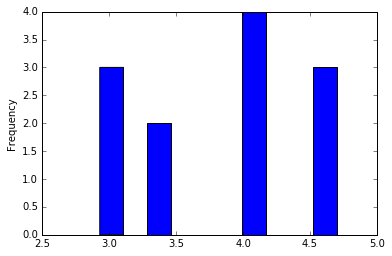

In [86]:
df_gas_kubm['TariffValue'].plot.hist()

### Более сложные запросы и метод `query()`

Допустим, мы с самого начала хотели выбрать из исходной таблицы те строки, в которых указан тариф на газ и в качестве единицы измерения указаны `руб/кв.м`. Это можно сделать разными способами. Например, вот так:

In [87]:
df[ (df['TariffItem'] == "Газ") & (df['UnitOfMeasure'] == "руб/кв.м") ]

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
52,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.01.2012,30.06.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,22.27,19693622,NaN


Обратите внимание на амперсанд `&` (логическое И) и на скобки — они обязательны.

Как работает эта штука? Очень просто: `df['TariffItem'] == "Газ"` — один ряд с булевскими значениями, `df['UnitOfMeasure'] == "руб/кв.м"` — другой, амперсанд `&` делает поэлементное «И» с этими двумя рядами — в результате получается ряд, в котором стоит `True` только если выполнялись оба условия — и именно по этому ряду мы и производим выборку элементов.

Этот синтаксис не назовёшь лаконичным и разработчики *pandas* предложили другой — впрочем, в документации сказано, что он носит экспериментальный характер.

In [88]:
df.query('TariffItem == "Газ" and UnitOfMeasure == "руб/куб.м"')

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
7,город Москва,Газ,руб/куб.м,11.01.2011,15.01.2012,да,NaN,NaN,на приготовление пищи и горячее водоснабжение ...,ООО «Мосрегионгаз»,4.09,19693595,NaN
8,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.09,19693684,NaN
11,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.70,19693624,NaN
13,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на приготовление пищи и нагрев воды с использо...,ООО «Газпром межрегионгаз Москва»,4.70,19693623,NaN
14,город Москва,Газ,руб/куб.м,11.01.2011,15.01.2012,да,NaN,NaN,"на отопление жилых помещений, а также в случае...",ООО «Мосрегионгаз»,2.93,19693594,NaN
22,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на приготовление пищи и нагрев воды с использо...,ООО «Газпром межрегионгаз Москва»,4.09,19693685,NaN
24,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на приготовление пищи и нагрев воды с использо...,ООО «Газпром межрегионгаз Москва»,4.70,19693307,NaN
71,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на приготовление пищи и нагрев воды с использо...,ООО «Газпром межрегионгаз Москва»,4.09,19693683,NaN


### И немного о JSON

Портал открытых данных г. Москвы предоставляет доступ к своим материалам через [API](http://api.data.mos.ru/Docs) — с его помощью можно получить доступ к различным наборам данных в более автоматическом режиме (не надо ничего скачивать и разархивировать). Правда, данные возвращаются в JSON:

In [89]:
r = requests.get("http://api.data.mos.ru/v1/datasets/1130/rows")

In [90]:
r.json()[:3]

[{'Cells': {'Agency': 'ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО «МТК»',
   'ConsumptionTarget': None,
   'ConsumptionTime': None,
   'EndDate': '30.06.2012',
   'MeasureDeviceAvail': 'да',
   'Region': 'город Москва (за исключением Троицкого и Новомосковского АО)',
   'StartDate': '01.01.2012',
   'StoveType': None,
   'TariffItem': 'Горячее водоснабжение',
   'TariffValue': 105.45,
   'UnitOfMeasure': 'руб/куб.м',
   'global_id': 19693618},
  'Id': '52406d3d-93dc-4def-b9c0-28df28d76054',
  'Number': 1},
 {'Cells': {'Agency': 'МГУП «Мосводоканал»',
   'ConsumptionTarget': None,
   'ConsumptionTime': None,
   'EndDate': '30.06.2012',
   'MeasureDeviceAvail': 'да',
   'Region': 'город Москва (за исключением Троицкого и Новомосковского АО)',
   'StartDate': '01.01.2012',
   'StoveType': None,
   'TariffItem': 'Водоотведение',
   'TariffValue': 16.65,
   'UnitOfMeasure': 'руб/куб.м',
   'global_id': 19693667},
  'Id': '0bc84c41-b103-4db9-afa1-dbe2d9176e4f',
  'Number': 2},
 {'Cells':

Как сделать из такого JSON датафрейм? Считайте это домашним заданием!